# Лабораторная работа №6

## Численный поиск экстремума функции многих переменных

### Задание 1

*Найти точку минимума функции $f(x_1, x_2) =2\cdot(x_1)^2+3\cdot(x_2-1.5)^2+1; [x_1^0= -1, x_2^0= 2]$ методом
Ньютона. $(x_1^0,x_2^0)$-начальная точка. Обеспечить работу программы с функциями любой размерности (до 10 включительно). Построить график функции В окрестности точки максимума оценить овражность, построить
линии уровня и траекторию поиска.*

Большинство процессов, используемых для приближенного нахожения экстремума можно представить как итерационные в виде $x^{k+1} = x^k + α^kp^k$, где $p^k$- вектор, определяющий направление движения от точки $x^k$ к точке $x^{k+1}$, $α^k$ - числовой множитель, величина которого задаетдлину шага в направлении $p^k$.


Среди методов второго порядка основными являются методы,
связанные с идеей локальной аппроксимации заданной функции квадратичной функцией.Для получения итерационной формулы мнтода Ньютона, запишем для функции $f(x)$ в окрестности точки $x^k$ формулу Тейлора 2-го порядка. $f(x) =Q_k(x) + o(∥x − x^k∥^2), ∥x − xk ∥ → 0$

$Q_k(x) = f(x^k)+(∇f(x^k),(x−x^k))+\frac{1}{2}(∇^2f(x^k)(x−x^k),(x−x^k)).$ В случае, когда гессиан $∇^2f(x^k)$ положительно определен, квадратичная функция $Q_k(x)$ достигает глобального минимума в точке $x^{k+1} = x^k − [∇^2f(x^k)]^{−1}∇f(x^k)$. Это и  есть итерационная формула метода Ньютона.

Таким образом, в этом методе $α^k = 1$ и $p^k = −[∇^2f(x^k)]^{−1}∇f(x^k)$. Практически $p^k$ удобнее искать, решая систему линейных уравнений $[∇^2f(x^k)]p^k = −∇f(x^k)$

In [1]:
import numpy as np
from scipy import *
from scipy.linalg import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pylab
from matplotlib import cm

In [2]:
def f (p):
    z=2*(p[0])**2+3*(p[1]-1.5)**2+1
    return z

*График функции*

In [3]:
x = np.arange (-30, 30, 1)
y = np.arange (-30, 30, 1)
xg, yg,=np.meshgrid(x, y)
z =f(np.meshgrid(x, y))
fig = pylab.figure()
axes = Axes3D(fig)
axes.plot_surface(xg, yg, z,rstride=4, cstride=4, cmap = cm.jet)
pylab.show()

*Программа может работать с исходной функцией в режиме «черного ящика» (black box)*

In [4]:
def M (F,point,e):
    p=np.array(point,dtype=np.double)
    pn=np.array(point,dtype=np.double)
    X=np.array(point,dtype=np.double)
    n=0
    while True:
        # grad
        h=0.01
        g=[]
        for i in range(len(point)):
            q=F(p)
            p[i]=p[i]+h
            r= F(p)
            p[i]=p[i]+h
            c=F(p)
            df=(-3*q+4*r-c)/(2*h)
            p[i]=p[i]-2*h
            g.append(df)
        g=np.array(g,dtype=np.double)
        g=-g
        g=transpose(g)
    
       
        H=np.zeros((len(p), len(p)),dtype=np.double)
        for i in range(len(p)):
            for j in range(len(p)):
                    p[i]=p[i]+h
                    p[j]= p[j]+h
                    q=F(p)
                    p[j]= p[j]-2*h
                    c=F(p)
                    p[i]=p[i]-2*h
                    p[j]= p[j]+2*h
                    r=F(p)
                    p[j]= p[j]-2*h
                    b=F(p)
                    p=np.array(pn,dtype=np.double)
                    ddf=(q-r-c+b)/(4*h**2)
                    H[i][j]=ddf

        a=solve(H,g)
        pn=p+a 
        n=n+1
        if norm(F(p)-F(pn))<e:
            break  
        X=np.row_stack((X, pn))
        p=pn 
    return X
A=M(f,[-1,2],0.01)
print(" ")
print(A) 

 
[[ -1.00000000e+00   2.00000000e+00]
 [  1.11022302e-13   1.50000000e+00]]


*Построение линий уровня и траектории поиска*

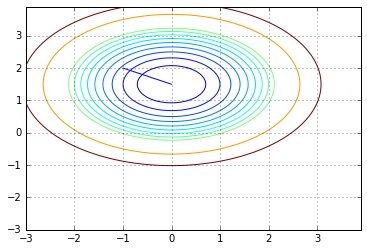

In [5]:
% matplotlib inline
x = np.arange (-3, 4, 0.1)
y = np.arange (-3, 4, 0.1)
xg, yg = np.meshgrid(x, y)
level =[0.1,0.5,1,2,3,4,5,6,7,8,9,10,15,20]
z =f(np.meshgrid(x, y))
pylab.contour(xg, yg, z,level)
pylab.plot(A[:,0] ,A[:,1])
pylab.grid(True)
pylab.show()

*Оценим овражность*

In [6]:
point=(A[len(A)-1][0],A[len(A)-1][1])
p=np.array(point,dtype=np.double) 
h=0.01
H=np.zeros((len(p), len(p)),dtype=np.double)
for i in range(len(p)):
    for j in range(len(p)):
            p[i]=p[i]+h
            p[j]= p[j]+h
            q=f(p)
            p[j]= p[j]-2*h
            c=f(p)
            p[i]=p[i]-2*h
            p[j]= p[j]+2*h
            r=f(p)
            p[j]= p[j]-2*h
            b=f(p)
            p=np.array(point,dtype=np.double)
            ddf=(q-r-c+b)/(4*h**2)
            H[i][j]=ddf
            
print("Матрица Гессе:")
print(H)
S=eigvals(H)
print("Собственные значения матрицы:")
print(S)
print("Овражность")
print(max(S)/min(S))

Матрица Гессе:
[[ 4.  0.]
 [ 0.  6.]]
Собственные значения матрицы:
[ 4.+0.j  6.+0.j]
Овражность
(1.5+0j)


### Задание 2

*Обеспечить работу программы с функциями любой размерности (до  10 включительно)*

In [6]:
def f2 (p):
    z=(p[0])**2+(p[1]-1)**2+(p[2]-2)**2+(p[3]-3)**2+(p[4]-4)**2++(p[5]-5)**2+(p[6]-6)**2+(p[7]-7)**2+(p[8]-8)**2++(p[9]-9)**2
    return z

In [7]:
def M (F,point,e):
    p=np.array(point,dtype=np.double)
    pn=np.array(point,dtype=np.double)
    X=np.array(point,dtype=np.double)
    while True:
        # grad
        h=0.01
        g=[]
        for i in range(len(point)):
            q=F(p)
            p[i]=p[i]+h
            r= F(p)
            p[i]=p[i]+h
            c=F(p)
            df=(-3*q+4*r-c)/(2*h)
            p[i]=p[i]-2*h
            g.append(df)
        g=np.array(g,dtype=np.double)
        g=-g
        g=transpose(g)
    
       
        H=np.zeros((len(p), len(p)),dtype=np.double)
        for i in range(len(p)):
            for j in range(len(p)):
                    p[i]=p[i]+h
                    p[j]= p[j]+h
                    q=F(p)
                    p[j]= p[j]-2*h
                    c=F(p)
                    p[i]=p[i]-2*h
                    p[j]= p[j]+2*h
                    r=F(p)
                    p[j]= p[j]-2*h
                    b=F(p)
                    p=np.array(pn,dtype=np.double)
                    ddf=(q-r-c+b)/(4*h**2)
                    H[i][j]=ddf

        a=solve(H,g)
        pn=p+a 
        if norm(F(p)-F(pn))<e:
            break  
        p=pn
    return pn
A=M(f2,[-2,7,2,-2,4,0,4,-4,1,-1],0.001)
print(" ")
print(A) 

 
[-0.02  1.    2.    3.    4.    5.    6.    7.    8.    9.  ]


#### Выполнил Квашенников Дмитрий. 431 группа